In [174]:
import numpy as np
import pandas as pd

from nilearn import image
import os.path as op

from braincoder.utils import get_rsq

In [190]:
bids_folder = '/data/ds-prfsynth/BIDS'

ds = 'smallgrid'

# Load ground truth

def get_ground_truth(ds=ds, bids_folder=bids_folder):

    fn = op.join(bids_folder, 'derivatives', 'prfsynth', f'sub-{ds}', 'ses-1', f'sub-{ds}_ses-1_task-prf_acq-normal_run-01_bold.json')

    ground_truth = pd.read_json(fn)

    ground_truth = pd.concat((ground_truth.drop(['HRF', 'RF', 'Stimulus', 'Noise'], axis=1), ground_truth.apply(lambda row: pd.Series(row['RF']), axis=1)), axis=1, keys=['base', 'rf'])

    ground_truth = ground_truth.droplevel(0, axis=1)

    # # Remove capitalisation from column names
    ground_truth.columns = [col.lower() for col in ground_truth.columns]


    return ground_truth

def get_estimates(package='braincoder', ds=ds, bids_folder=bids_folder):

    if package == 'braincoder':
        pars = ['centerx0', 'centery0', 'sigmamajor', 'sigmaminor', 'beta', 'baseline']
        fn_template = 'sub-{ds}_ses-1_task-prf_{par}.nii.gz'

    elif package == 'vista':
        pars = ['centerx0', 'centery0', 'sigmamajor', 'sigmaminor']
        fn_template = 'sub-{ds}_ses-1_task-prf_acq-normal_run-01_{par}.nii.gz'  #sub-verysmall_ses-1_task-prf_acq-normal_run-01_centerx0.nii.gz

    elif package == 'popeye':
        pars = ['centerx0', 'centery0', 'sigmamajor', 'sigmaminor', 'exponent', 'beta', 'baseline']
        fn_template = 'sub-{ds}_ses-1_task-prf_acq-normal_run-01_{par}.nii.gz'

    elif package == 'afni':
        pars = ['centerx0', 'centery0', 'sigmamajor', 'sigmaminor']
        fn_template = 'sub-{ds}_ses-1_task-prf_acq-normal_run-01_{par}.nii.gz'

    else:
        raise NotImplementedError('Only braincoder is implemented')

    pars_df = pd.DataFrame(columns=pars)

    for par in pars:
        fn = op.join(bids_folder, 'derivatives', f'prfanalyze-{package}', f'sub-{ds}', 'ses-1', fn_template.format(ds=ds, par=par))
        img = image.load_img(fn)
        pars_df[par] = img.get_fdata().flatten()

    return pars_df


def get_data(ds=ds, bids_folder=bids_folder):

    fn = op.join(bids_folder, f'sub-{ds}', 'ses-1', 'func', f'sub-{ds}_ses-1_task-prf_acq-normal_run-01_bold.nii.gz')

    return pd.DataFrame(image.load_img(fn).get_fdata().reshape(-1, image.load_img(fn).shape[-1]).T)


def get_modelpred(package='braincoder', ds=ds, bids_folder=bids_folder):

    folder = op.join(bids_folder, 'derivatives', f'prfanalyze-{package}', f'sub-{ds}', 'ses-1')

    if package == 'braincoder':
        fn = op.join(folder, f'sub-{ds}_ses-1_task-prf_modelpred.nii.gz')

    elif package == 'vista':
        fn = op.join(folder, f'sub-{ds}_ses-1_task-prf_acq-normal_run-01_modelpred.nii.gz')

    else:
        raise NotImplementedError(f'Package {package} not implemented')

    return pd.DataFrame(image.load_img(fn).get_fdata().reshape(-1, image.load_img(fn).shape[-1]).T)


In [ ]:
delattr

In [191]:


braincoder_pred = get_modelpred(ds='smallgrid')


,0,1,2,3,4,5,6,7,8,9,...,480,481,482,483,484,485,486,487,488,489
0,9809.663086,9864.473633,9834.121094,9833.787109,9796.944336,9840.210938,9905.200195,9853.451172,9865.606445,9856.701172,...,9965.083008,9938.974609,9956.932617,9907.177734,9902.113281,9915.741211,9995.478516,9937.117188,9948.343750,9964.184570
1,9809.663086,9864.473633,9834.121094,9833.787109,9796.944336,9840.210938,9905.200195,9853.451172,9865.606445,9856.701172,...,9965.083008,9938.974609,9956.932617,9907.177734,9902.113281,9915.741211,9995.478516,9937.117188,9948.343750,9964.184570
2,9809.663086,9864.473633,9834.121094,9833.787109,9796.944336,9840.210938,9905.200195,9853.451172,9865.606445,9856.701172,...,9965.083008,9938.974609,9956.932617,9907.177734,9902.113281,9915.741211,9995.478516,9937.117188,9948.343750,9964.184570
3,9809.663086,9864.473633,9834.121094,9833.787109,9796.944336,9840.210938,9905.200195,9853.451172,9865.606445,9856.701172,...,9965.083008,9938.974609,9956.932617,9907.177734,9902.113281,9915.741211,9995.478516,9937.117188,9948.343750,9964.184570
4,9809.663086,9864.473633,9834.121094,9833.787109,9796.944336,9840.210938,9905.200195,9853.451172,9865.606445,9856.701172,...,9965.083008,9938.974609,9956.932617,9907.177734,9902.113281,9915.741211,9995.478516,9937.117188,9948.343750,9964.184570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9798.581055,9846.364258,9812.970703,9794.351562,9742.564453,9775.891602,9830.759766,9839.660156,9845.809570,9820.488281,...,9907.500000,9899.363281,9920.317383,9872.956055,9861.364258,9862.730469,9953.249023,9892.174805,9917.623047,9925.697266
196,9802.359375,9852.131836,9819.478516,9805.304688,9756.108398,9790.485352,9845.615234,9844.212891,9851.860352,9830.465820,...,9911.784180,9894.321289,9912.449219,9876.031250,9863.108398,9859.646484,9952.696289,9896.252930,9905.308594,9925.495117
197,9804.959961,9856.274414,9824.250977,9813.823242,9767.282227,9803.156250,9859.442383,9847.412109,9856.314453,9838.256836,...,9918.748047,9894.631836,9910.912109,9880.291992,9867.081055,9861.939453,9955.710938,9902.086914,9900.744141,9928.454102
198,9806.699219,9859.153320,9827.629883,9820.173828,9776.041016,9813.500977,9871.332031,9849.591797,9859.478516,9844.088867,...,9926.784180,9898.367188,9913.596680,9884.953125,9872.155273,9867.474609,9960.744141,9908.503906,9901.527344,9933.177734


In [187]:
braincoder_estimates = get_estimates('braincoder', 'smallgrid')
vista_estimates = get_estimates('vista', 'smallgrid')

ground_truth = get_ground_truth('smallgrid')

<Axes: xlabel='centerx0', ylabel='centerx0'>

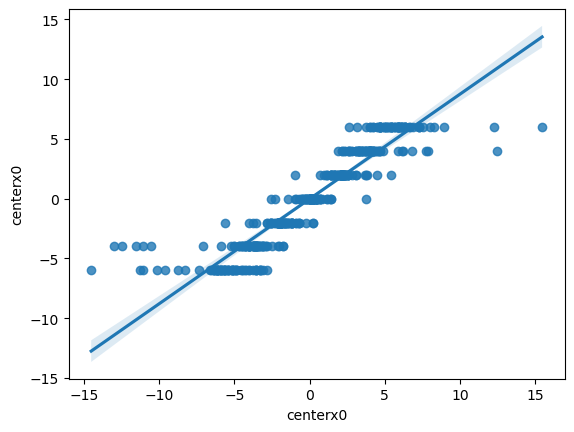

In [181]:
import seaborn as sns

sns.regplot(x=vista_estimates['centerx0'], y=ground_truth['centerx0'])

In [ ]:
ground_truth

,tr,type,cssexp,signalpercentage,boldcontrast,boldmeanvalue,computesubclasses,snr,centerx0,centery0,theta,sigmamajor,sigmaminor,dog_sigmamajor,dog_sigmaminor,dog_theta,dog_scale,type
0,1,linear,0.05,bold,5,10000,True,1.409749,-6,-6,0,1,1,2,2,0,0.5,mrvista
1,1,linear,0.05,bold,5,10000,True,0.521460,-4,-6,0,1,1,2,2,0,0.5,mrvista
2,1,linear,0.05,bold,5,10000,True,0.986875,-2,-6,0,1,1,2,2,0,0.5,mrvista
3,1,linear,0.05,bold,5,10000,True,1.037965,0,-6,0,1,1,2,2,0,0.5,mrvista
4,1,linear,0.05,bold,5,10000,True,1.211563,2,-6,0,1,1,2,2,0,0.5,mrvista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1,linear,0.05,bold,5,10000,True,-5.955186,-2,6,0,5,5,2,2,0,0.5,mrvista
486,1,linear,0.05,bold,5,10000,True,-5.819970,0,6,0,5,5,2,2,0,0.5,mrvista
487,1,linear,0.05,bold,5,10000,True,-5.541784,2,6,0,5,5,2,2,0,0.5,mrvista
488,1,linear,0.05,bold,5,10000,True,-6.983702,4,6,0,5,5,2,2,0,0.5,mrvista


In [ ]:
ground_truth

,tr,type,cssexp,signalpercentage,boldcontrast,boldmeanvalue,computesubclasses,snr,centerx0,centery0,theta,sigmamajor,sigmaminor,dog_sigmamajor,dog_sigmaminor,dog_theta,dog_scale,type
0,1,linear,0.05,bold,5,10000,True,1.409749,-6,-6,0,1,1,2,2,0,0.5,mrvista
1,1,linear,0.05,bold,5,10000,True,0.521460,-4,-6,0,1,1,2,2,0,0.5,mrvista
2,1,linear,0.05,bold,5,10000,True,0.986875,-2,-6,0,1,1,2,2,0,0.5,mrvista
3,1,linear,0.05,bold,5,10000,True,1.037965,0,-6,0,1,1,2,2,0,0.5,mrvista
4,1,linear,0.05,bold,5,10000,True,1.211563,2,-6,0,1,1,2,2,0,0.5,mrvista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1,linear,0.05,bold,5,10000,True,-5.955186,-2,6,0,5,5,2,2,0,0.5,mrvista
486,1,linear,0.05,bold,5,10000,True,-5.819970,0,6,0,5,5,2,2,0,0.5,mrvista
487,1,linear,0.05,bold,5,10000,True,-5.541784,2,6,0,5,5,2,2,0,0.5,mrvista
488,1,linear,0.05,bold,5,10000,True,-6.983702,4,6,0,5,5,2,2,0,0.5,mrvista


<Axes: xlabel='centerx0', ylabel='centerx0'>

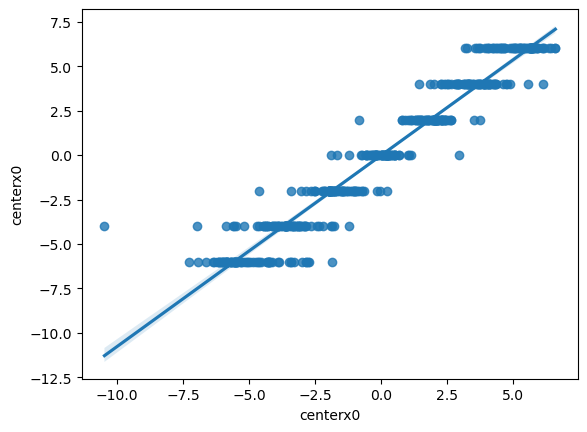

In [182]:
import seaborn as sns

sns.regplot(x=braincoder_estimates['centerx0'], y=ground_truth['centerx0'])

<Axes: xlabel='centery0', ylabel='centery0'>

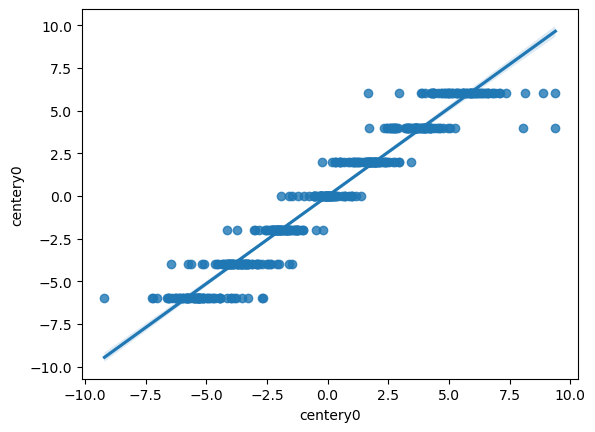

In [183]:
sns.regplot(x=braincoder_estimates['centery0'], y=ground_truth['centery0'])

<Axes: xlabel='sigmamajor', ylabel='sigmamajor'>

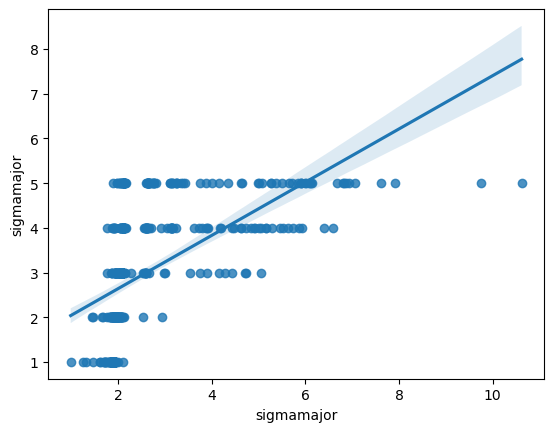

In [184]:
sns.regplot(x=braincoder_estimates['sigmamajor'], y=ground_truth['sigmamajor'])

<Axes: xlabel='sigmamajor', ylabel='sigmamajor'>

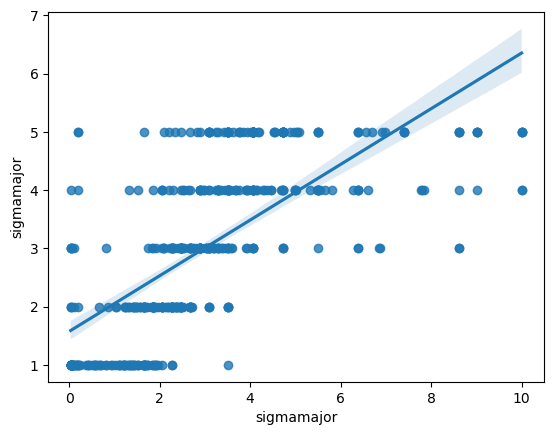

In [185]:
import seaborn as sns

sns.regplot(x=vista_estimates['sigmamajor'], y=ground_truth['sigmamajor'])